###### Maestría Inteligencia de Negocios y Análisis de Datos
###### Curso: Statistical Learning II
###### Alumno: 22008375- Leonel Eduardo Contreras
###### Sección L

### Examen Final

Importar Librerias

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.cluster import KMeans
from summarytools import dfSummary
import matplotlib.pyplot as plt
import scipy.stats as stats
from sklearn.preprocessing import MinMaxScaler
import plotly.express as px

Cargar Archivo

In [2]:
df= pd.read_csv('BankChurners.csv')

Exploración de datos

In [3]:
# Forma de dataset
df.shape

(10127, 23)

In [4]:
# Columnas
df.columns

Index(['CLIENTNUM', 'Attrition_Flag', 'Customer_Age', 'Gender',
       'Dependent_count', 'Education_Level', 'Marital_Status',
       'Income_Category', 'Card_Category', 'Months_on_book',
       'Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
       'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt',
       'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio',
       'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1',
       'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2'],
      dtype='object')

In [5]:
# Tipo de datos
df.dtypes

CLIENTNUM                                                                                                                               int64
Attrition_Flag                                                                                                                         object
Customer_Age                                                                                                                            int64
Gender                                                                                                                                 object
Dependent_count                                                                                                                         int64
Education_Level                                                                                                                        object
Marital_Status                                                                                                                         object
Income

In [6]:
# Visualizar data
df.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,0.000093,0.99991
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,0.000057,0.99994
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,0.000021,0.99998
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,0.000134,0.99987
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,4716.0,0,4716.0,2.175,816,28,2.500,0.000,0.000022,0.99998


In [7]:
# Variables con Nulos
cols_Nan=[col for col in df.columns if(df[col].isnull().mean()>0)]
cols_Nan

[]

In [8]:
# Tipo de Variables

def getDateColTypes (df):
    categoricas=[]
    continuas=[]
    discretas=[]

    for colName in df.columns:
        if(df[colName].dtype=='object'):
            categoricas.append(colName)
        else:
            if((df[colName].dtype=='int64')or (df[colName].dtype=='float64')or (df[colName].dtype=='uint8')):
                if (len(df[colName].unique())<=30):
                    discretas.append(colName)
                else:
                    continuas.append(colName)
    return categoricas, continuas, discretas



In [9]:
# Obtener tipos de varaibles
categoricas, continuas, discretas=getDateColTypes(df)

In [10]:
# Variables categoricas
categoricas

['Attrition_Flag',
 'Gender',
 'Education_Level',
 'Marital_Status',
 'Income_Category',
 'Card_Category']

In [11]:
# Obtener de las variables categoricas la cantidad de valores unicos
for var in categoricas:
    print(f'{var}: {df[var].nunique()}')

Attrition_Flag: 2
Gender: 2
Education_Level: 7
Marital_Status: 4
Income_Category: 6
Card_Category: 4


Ingenieria de caracteristicas

In [12]:
# One Hot Encoding a las variables 'Attrition_Flag' y 'Gender' (el resto tiene elevado la cantidad de valores unicos para OHE)

ohe_attrition=pd.get_dummies(df['Attrition_Flag'],drop_first=True)
ohe_gender=pd.get_dummies(df['Gender'],drop_first=True)

df['Gender']=ohe_gender # Female: 0, Male: 1
df['Attrition_Flag']=ohe_attrition # Existing : 1, Attrited : 0

In [13]:
# Frecuency Encoding a las variables: 'Education_Level','Marital_Status','Income_Category','Card_Category'

frecuency=['Education_Level','Marital_Status','Income_Category','Card_Category']

for var in frecuency:

    mapper=(df[var].value_counts().sort_values(ascending=False)).to_dict()

    df[var]= df[var].map(mapper)

In [14]:
# Obtener nuevamente tipos de varaibles
categoricas, continuas, discretas=getDateColTypes(df)

In [15]:
print(f'discretas: {discretas}')
print(f'continuas: {continuas}')
print(f'categoricas: {categoricas}')

discretas: ['Attrition_Flag', 'Gender', 'Dependent_count', 'Education_Level', 'Marital_Status', 'Income_Category', 'Card_Category', 'Total_Relationship_Count', 'Months_Inactive_12_mon', 'Contacts_Count_12_mon']
continuas: ['CLIENTNUM', 'Customer_Age', 'Months_on_book', 'Credit_Limit', 'Total_Revolving_Bal', 'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt', 'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio', 'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1', 'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2']
categoricas: []


In [16]:
# Analizar ya todas las variables Numericas
dfSummary(df)

No,Variable,Stats / Values,Freqs / (% of Valid),Graph,Missing
1,CLIENTNUM[int64],Mean (sd) : 739177606.3 (36903783.5)min < med < max:708082083.0 < 717926358.0 < 828343083.0IQR (CV) : 60106762.5 (20.0),"10,127 distinct values","<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAKoAAABGCAYAAABc8A97AAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjcuMCwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy88F64QAAAACXBIWXMAAA9hAAAPYQGoP6dpAAAC40lEQVR4nO3YsW7aUBSA4XMhQdcQ7hUhJVuWbonUASkLD9AxD5tH6MDQtRm6MGWJUBAyjYOFZdyhTdWqCuBrEDnk/2aObVm/uAdMURQCvHW1fT8AsImjdR8wxkQi0gi8/qIoinngLPDHylCNMVG3271xznVCLj6bzabGmFtiRVXrvlEbzrnOYDCYe+/TMheO49gOh8POZDJpiAihopK1R7+IiPc+7fV6zwHXjwJmgP/wYwoqECpUIFSoQKhQgVChAqFCBUKFCoQKFQgVKhAqVCBUqECoUIFQoQKhQgVChQqEChUIFSoQKlQgVKhAqFCBUKECoUIFQoUKhAoVCBUqECpUIFSoQKhQgVChAqFCBUKFCoQKFQgVKhAqVCBUqECoUIFQoQKhQgVChQqEChUIFSoQKlQgVKhAqFCBUKECoUIFQoUKhAoVCBUqECpUIFSoQKhQ4WjfD3CIjDGRiDQCxxdFUcy3+TyHgFC3zBgTdbvdG+dcJ2R+NptNjTG3xPovQt2+hnOuMxgM5t77tMxgHMd2OBx2JpNJQ0QI9S87DTXP82MRccaY0EuoPQa992mv13suO5fnuZN3+s5W2VmoSZIcZ1n26eLiol6v10t9s7x4b8cg7+x1Owt1sVgcWWub/X4/PT8/n5adf4/HIO/sdTvfUVutVtAR+Fu01YdRYl/vrOK/FSK//u5cBs6uXFn4MXVgKvwusKenp5+9963Q+yZJ8vHk5GRUq9WysvPrVhZCPSBVdtwsy6yIXF1fX389Ozublb33/f195+7u7kO/3/9edm3ZZGUh1FdUOAbdcrk83vbzbKLKjvs7tKa1NgtZO6bTaSRSaW1ZubK86VAr/r1VZV8KPgazLLN5nl+lafpFREL3zEpCYnkJ7a3aKNQ4jm3ZCz89PVkRkSRJ7Hg8bpadf3h4aIceY1X3pZdj8PLy8lu73f5RZvbx8dGORqNmHMet8Xi8KDNb9Z1Vmd/nvTfp6yeJ80MUZUbkNQAAAABJRU5ErkJggg=="">",0(0.0%)
2,Attrition_Flag[uint8],Mean (sd) : 0.8 (0.4)min < med < max:0.0 < 1.0 < 1.0IQR (CV) : 0.0 (2.3),2 distinct values,"<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAKoAAABGCAYAAABc8A97AAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjcuMCwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy88F64QAAAACXBIWXMAAA9hAAAPYQGoP6dpAAABtklEQVR4nO3ZTYqDQBCG4apBRDfdiOBhPEQOm0N4GwntIkog6dnNZpj8dDJkvuF9tlpFL14U0XPOBvx1H+8+AHCP6t0HwP/h7q2Z1YXjp5zz+tNFQsVLuHvb9/0uhNCVzC/LcnD3/U+xEipepQ4hdOM4rjHG7ZHBlFIzTVM3z3NtZoSK3xdj3IZhOBaMttcu8jEFCYQKCYQKCYQKCYQKCYQKCYQKCYQKCYQKCYQKCYQKCYQKCYQKCYQKCYQKCYQKCYQKCYQKCYQKCYQKCYQKCYQKCYQKCYQKCYQKCYQKCYQKCYQKCYQKCYQKCYQKCYQKCYQKCYQKCYQKCYQKCYQKCYQKCYQKCYQKCYQKCYQKCYQKCYQKCYQKCYQKCYQKCYQKCYQKCYQKCdWtG9y9NbO6cP8p57wWzgJfrobq7m3f97sQQleyfFmWg7vviRXPuvVErUMI3TiOa4xxe2RxSqmZpqmb57k2M0LFU26++s3MYozbMAzHgv1twQzwDR9TkECokECokECokECokECokECokECokECokHDXn6mUUvPo4pRScz6fKzML7v7wwSAnXC6XqrSVW/d8AkonTn2ckm/eAAAAAElFTkSuQmCC"">",0(0.0%)
3,Customer_Age[int64],Mean (sd) : 46.3 (8.0)min < med < max:26.0 < 46.0 < 73.0IQR (CV) : 11.0 (5.8),45 distinct values,"<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAKoAAABGCAYAAABc8A97AAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjcuMCwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy88F64QAAAACXBIWXMAAA9hAAAPYQGoP6dpAAACj0lEQVR4nO3dPY7aQBiH8f+EDxmQbCEk6LhApBSUHCKHzRFScAJuQIe0QiC862CMU6SKBLvgj915h+fXT9bFI2RPxq9dWZYCfPftqy8AuEf3qy/AV865gaR+xeWnsizfmryeZ0eoVzjnBpPJ5Gccx+Mq6w+Hw84594tYm0Oo1/XjOB4vl8u3JEmyRxbu9/totVqNX15e+pIItSGE+o4kSbLpdPpaYemg8Yt5cjxMwQRChQmEChMIFSYQKkwgVJhAqDCBUGECocIEQoUJ/BdqC4qi6EmKnXNVlnPy6gpCbViapr08z3/M5/NOp9N56ECLxMmrWwi1YafTqRtF0XCxWGSz2Wz3yFpOXt1GqC0ZjUacvGpQsKHWPKEfXy6XXpPXg3qCDLXuCf08z6OiKL5nWfZbUpVfRTQsyFBV44S+JG02m/F6vR6ez+dOGxeHx4UaqqTqJ/R3ux33iZ5hwx8mECpMIFSYQKgwweuHqRp7oeyDBsbbUOvshbIPGh5vQ1WNvVD2QcPjc6iSqu2Fsg8aHh6mYAKhwgRChQmEChMIFSYQKkwgVJhAqDCBUGECocIEQoUJhAoTvD+U8mxqzq2SAp1dRageqTu3Sgp3dhWheqTO3Cop7NlVhOqhGnOrpEBnV/EwBRMIFSYQKkxo9R6V0Y9oSmuhMvoRTWrzF5XRj2hM69tTjH78XKF+kYV91ICE/EUWQg1IyF9kIdQAhfhFFvZRYQKhwgRChQmEChM+fJhi6jN88G6oTH2GLz76RWXqM7xw1z4qU5+fg88vFrLhD0n+v1hIqJDk/4uFhIr/+Ppi4V2h7vf76NF/+Hg8RpKUpmm03W6Hn7ne6t+2et3Sv0aKouiq+j3un7Isb95y/AUcdZM5QwCg9AAAAABJRU5ErkJggg=="">",0(0.0%)
4,Gender[uint8],Mean (sd) : 0.5 (0.5)min < med < max:0.0 < 0.0 < 1.0IQR (CV) : 1.0 (0.9),2 distinct values,"<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAKoAAABGCAYAAABc8A97AAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjcuMCwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy88F64QAAAACXBIWXMAAA9hAAAPYQGoP6dpAAABfElEQVR4nO3YQWoCMRiG4aQMopsZRPAwHqKH7SG8jZ

In [17]:
# Funcion para analizar normalidad de variables
def plot_density_qq(dataset,var):
    '''Esta funcion muestra la grafica de densidad y el plot QQ para verificar normalidad'''
    plt.figure(figsize=(15,6))

    plt.subplot(1,2,1)
    dataset[var].hist(bins=30)

    plt.subplot(1,2,2)
    stats.probplot(dataset[var],dist='norm',plot=plt)

    plt.show()

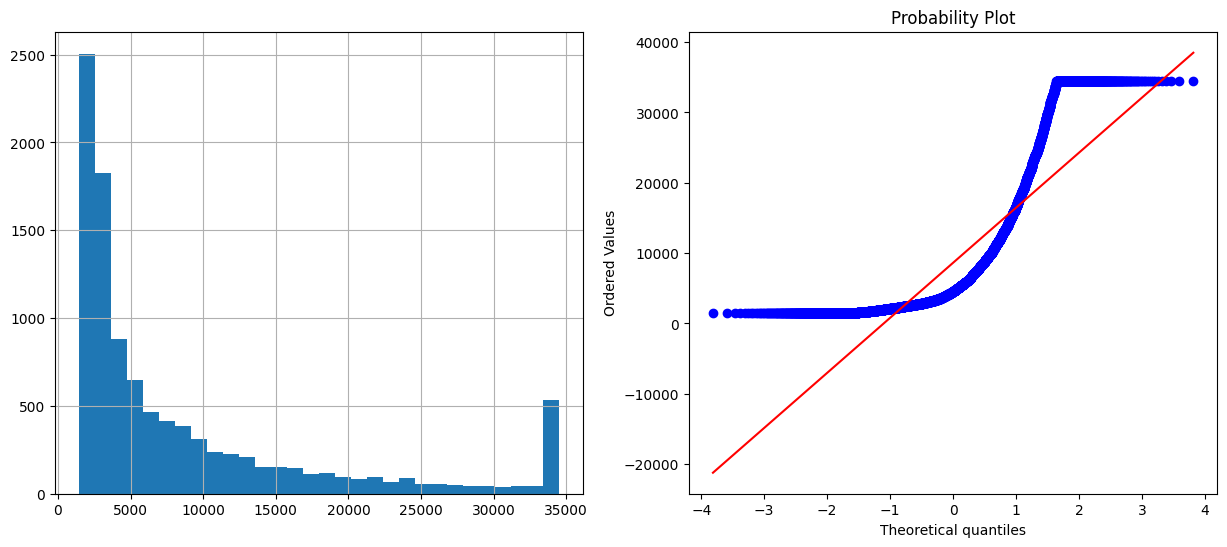

In [18]:
# Se elige Credit_Limit
plot_density_qq(df,'Credit_Limit')

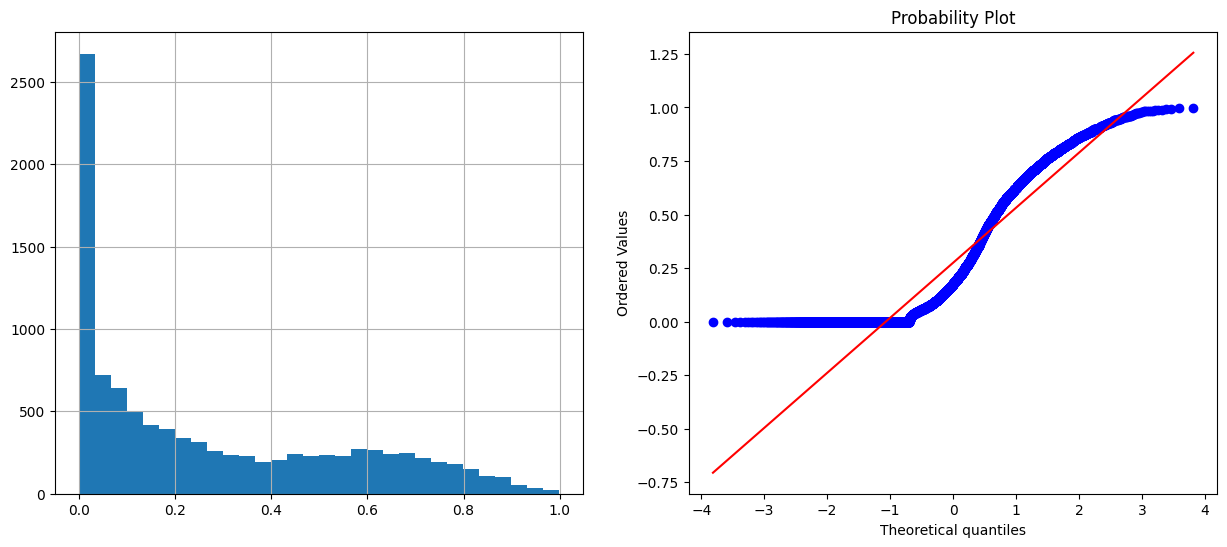

In [19]:
# Se elige Total_Revolving_Bal
plot_density_qq(df,'Avg_Utilization_Ratio')

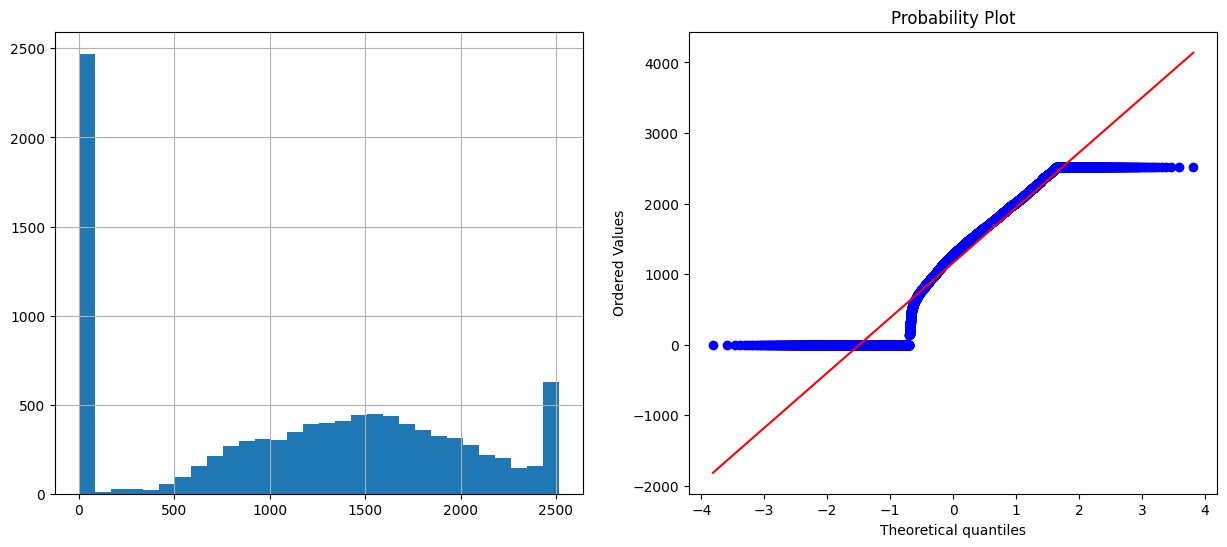

In [20]:
# Se elige Total_Revolving_Bal
plot_density_qq(df,'Total_Revolving_Bal')

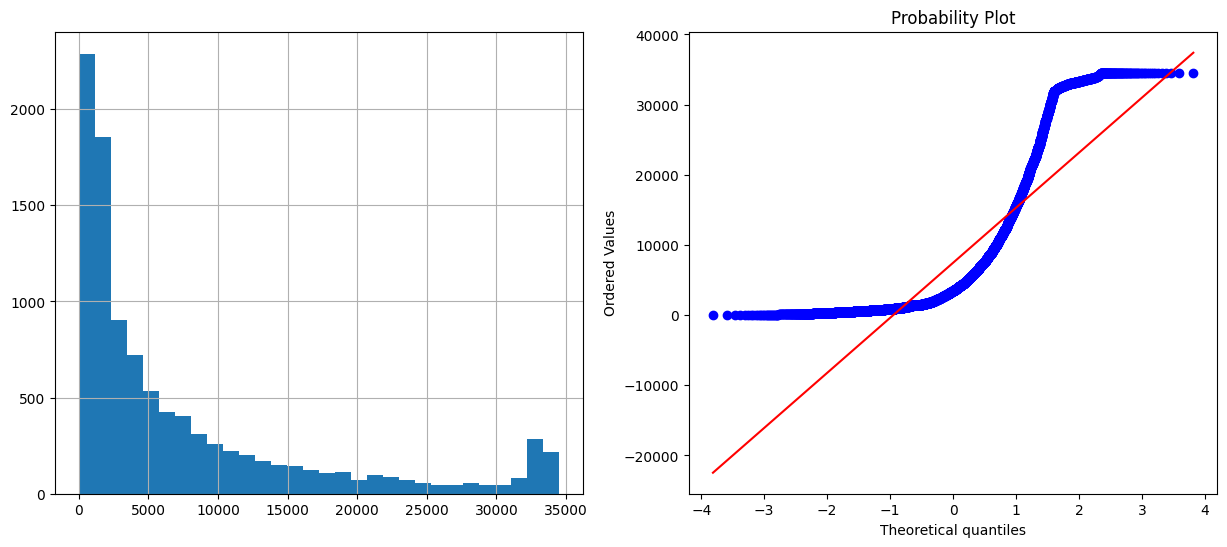

In [21]:
# Se elige Avg_Open_To_Buy
plot_density_qq(df,'Avg_Open_To_Buy')

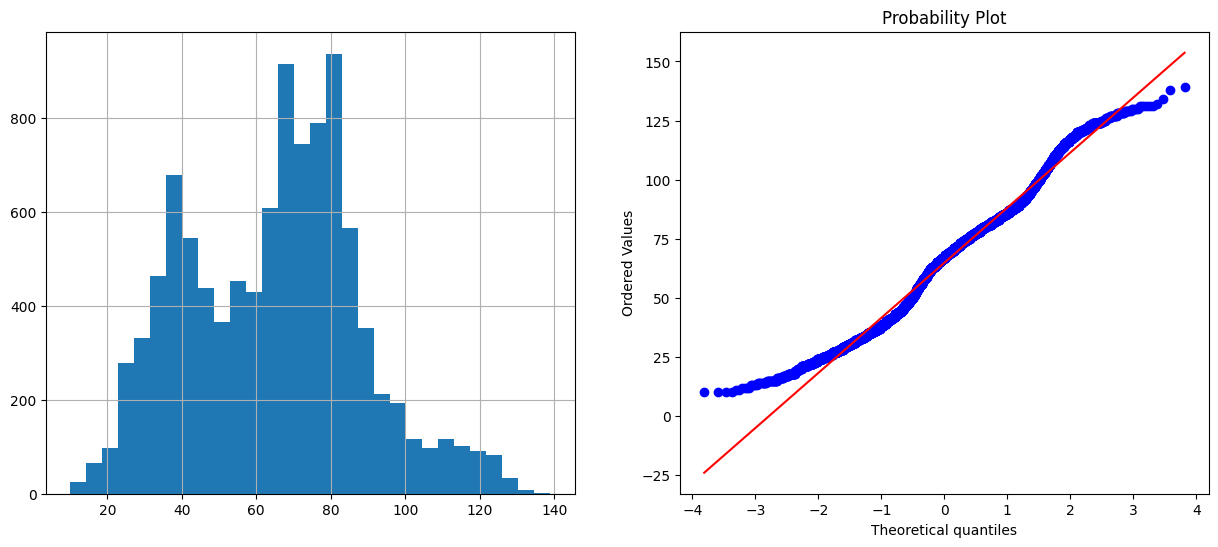

In [22]:
# Se elige Total_Trans_Ct
plot_density_qq(df,'Total_Trans_Ct')

In [23]:
# Elegir varaibles para determinar correlacion
dataset=df[['Total_Revolving_Bal','Avg_Open_To_Buy','Total_Trans_Ct','Credit_Limit','Avg_Utilization_Ratio']]

<Axes: >

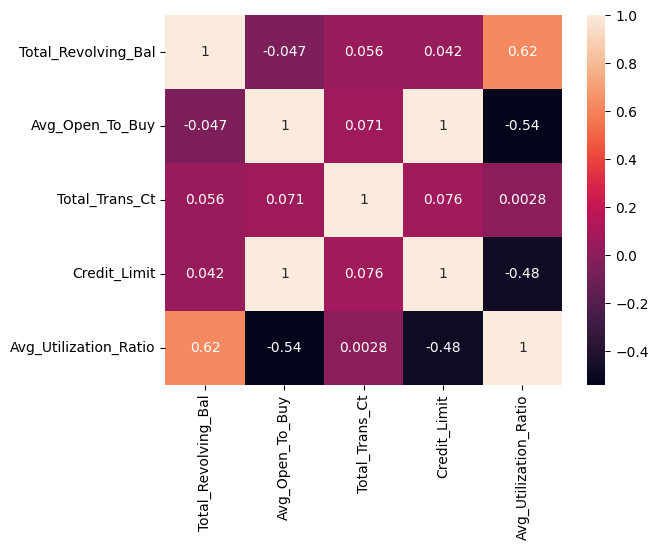

In [24]:
# Determinar correlacion entre las varaibles elegidas
sns.heatmap(dataset.corr(),annot=True)

In [25]:
# Elegir varaibles finales

# Se elimina 'Credit_Limit' por tener correlacion total con 'Avg_Open_To_Buy'
# Se elimina 'Avg_Utilization_Ratio' por tener correlacion alta con  'Total_Revolving_Bal'

dataset=df[['Total_Revolving_Bal','Avg_Open_To_Buy','Total_Trans_Ct']]
dataset

,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Trans_Ct
0,777,11914.0,42
1,864,7392.0,33
2,0,3418.0,20
3,2517,796.0,20
4,0,4716.0,28
...,...,...,...
10122,1851,2152.0,117
10123,2186,2091.0,69
10124,0,5409.0,60
10125,0,5281.0,62


In [26]:
# Analizar las variables elegidas con "describe" y determinar si requieren transformación
dataset.describe()

,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Trans_Ct
count,10127.000000,10127.000000,10127.000000
mean,1162.814061,7469.139637,64.858695
std,814.987335,9090.685324,23.472570
min,0.000000,3.000000,10.000000
25%,359.000000,1324.500000,45.000000
50%,1276.000000,3474.000000,67.000000
75%,1784.000000,9859.000000,81.000000
max,2517.000000,34516.000000,139.000000


In [27]:
# Tratamientos de Outliers

# Encontrar IQR, LI y LS de variables para hacer CAPPING

for col in dataset.columns:
    IQR=dataset[col].quantile(0.75)-dataset[col].quantile(0.25) #Q3 - Q1
    LI=dataset[col].quantile(0.25)-(IQR*1.75) #limite inferior
    LS=dataset[col].quantile(0.75)+(IQR*1.75)# limite superior
    
    if LI<0: #Evitar negativos 
        LI=0
    dataset[col]=np.where(dataset[col]>LS,LS,
                                np.where(dataset[col]<LI ,LI,dataset[col])) ##Sustituir los outliers por los limites


C:\Users\LEONEL\AppData\Local\Temp\ipykernel_19116\4147096742.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset[col]=np.where(dataset[col]>LS,LS,
C:\Users\LEONEL\AppData\Local\Temp\ipykernel_19116\4147096742.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset[col]=np.where(dataset[col]>LS,LS,
C:\Users\LEONEL\AppData\Local\Temp\ipykernel_19116\4147096742.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexe

In [28]:
# Aplicar MinMaxScaler: Normalizar las variables
# No se puede aplicar box cox por tener valores de cero

scaler=MinMaxScaler()
scaler.fit(dataset) 


data_scaled=scaler.transform(dataset)
data_scaled=pd.DataFrame(data_scaled,columns=dataset.columns)

In [29]:
# Resumen de la data con scaler
round(data_scaled.describe(),2) 

,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Trans_Ct
count,10127.00,10127.00,10127.00
mean,0.46,0.28,0.43
std,0.32,0.31,0.18
min,0.00,0.00,0.00
25%,0.14,0.05,0.27
50%,0.51,0.14,0.44
75%,0.71,0.40,0.55
max,1.00,1.00,1.00


Modelado Kmeans

1. Experimentacion

In [30]:
# Crear dos arreglos vacios para guardar las inercias y las K's (clusters) del modelo
inercias=[]
ks=[]

# Ejecutar un ciclo "for" para guardar en cada iteración la inercia y las K's 
# Segun la cantidad de clusters que va ir variando en el modelo
for k in range(1,30):
    modelo_iterado= KMeans(n_clusters=k,random_state=2023)
    modelo_iterado.fit(data_scaled)
    inercias.append(modelo_iterado.inertia_)
    ks.append(k)

c:\Users\LEONEL\anaconda3\envs\PythonClass\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\LEONEL\anaconda3\envs\PythonClass\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\LEONEL\anaconda3\envs\PythonClass\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\LEONEL\anaconda3\envs\PythonClass\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
 

In [31]:
# Pasar a diccionario las Ks y las Inercias, para luego hacer un dataframe
codo={'inercias':inercias,'ks':ks} 
codo=pd.DataFrame(codo)

In [32]:
# Visualizar dataframe de inericas y Ks
codo

,inercias,ks
0,2362.248670,1
1,1572.726564,2
2,938.133319,3
3,789.001684,4
4,656.196642,5
5,576.392081,6
6,522.288822,7
7,475.254211,8
8,431.585299,9
9,398.196709,10


<Axes: xlabel='ks', ylabel='inercias'>

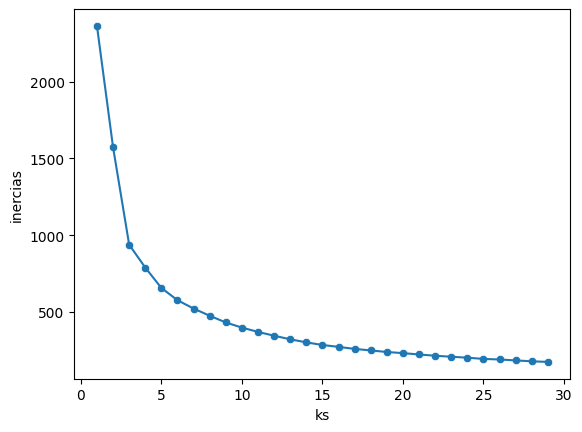

In [33]:
# Graficar de puntos y lineas de las inercias de cada cluster que se genero en el ciclo, para observar el efecto codo
sns.scatterplot(data=codo,x='ks',y='inercias') 
sns.lineplot(data=codo,x='ks',y='inercias') 

2. Se crea el modelo optimo de KMeans:
* Se observa con el codo que es de 3 clusters

In [34]:
modelo= KMeans(n_clusters=3,random_state=2023)
modelo.fit(data_scaled)

c:\Users\LEONEL\anaconda3\envs\PythonClass\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=3, random_state=2023)

In [35]:
# Agregarle al dataset el agrupamiento de los clusters generado por el modelo 

dataset['cluster'] = modelo.labels_
dataset

C:\Users\LEONEL\AppData\Local\Temp\ipykernel_19116\2386352287.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset['cluster'] = modelo.labels_


,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Trans_Ct,cluster
0,777.0,11914.0,42.0,2
1,864.0,7392.0,33.0,2
2,0.0,3418.0,20.0,2
3,2517.0,796.0,20.0,1
4,0.0,4716.0,28.0,2
...,...,...,...,...
10122,1851.0,2152.0,117.0,1
10123,2186.0,2091.0,69.0,1
10124,0.0,5409.0,60.0,2
10125,0.0,5281.0,62.0,2


In [36]:
# Realizar el conteo de registros por cada cluster
dataset['cluster'].value_counts()

1    5073
2    3201
0    1853
Name: cluster, dtype: int64

In [37]:
dataset.groupby(by='cluster').agg(['min','mean','max'])

Total_Revolving_Bal                      Avg_Open_To_Buy  \
                        min         mean     max             min   
cluster                                                            
0                       0.0  1211.024825  2517.0         11008.0   
1                     935.0  1720.721269  2517.0             3.0   
2                       0.0   250.724774  1061.0           457.3   

                                 Total_Trans_Ct                    
                 mean        max            min       mean    max  
cluster                                                            
0        21108.862520  24794.375           10.0  68.550998  139.0  
1         3191.950542  15022.000           11.0  65.589395  131.0  
2         4584.776945  17239.000           10.0  61.563261  131.0

Caracteristicas de los Clusters

* Saldo pendiente de pago: Medio , Promedio del límite de crédito: Alto , Número total de transacciones: Alto -->  A
* Saldo pendiente de pago: Alto , Promedio del límite de crédito: Bajo , Número total de transacciones: Medio --> B
* Saldo pendiente de pago: Bajo , Promedio del límite de crédito: Medio , Número total de transacciones: Bajo --> C

<Axes: xlabel='Total_Revolving_Bal', ylabel='Avg_Open_To_Buy'>

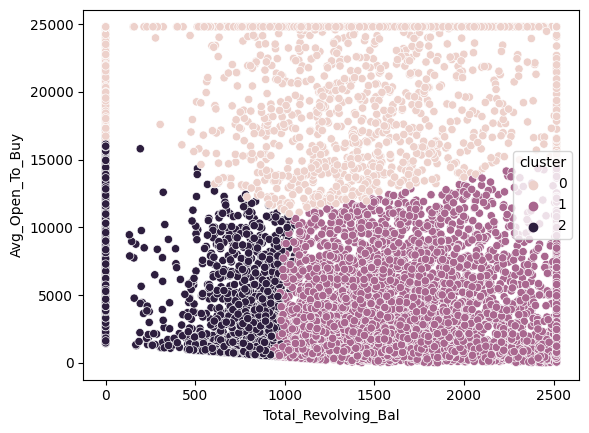

In [38]:
sns.scatterplot(data=dataset,x='Total_Revolving_Bal',y='Avg_Open_To_Buy',hue='cluster')

In [39]:
fig = px.scatter_3d(dataset, x = 'Total_Revolving_Bal',
y = 'Avg_Open_To_Buy',
z = 'Total_Trans_Ct',
color = 'cluster')

fig.show()